<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes')

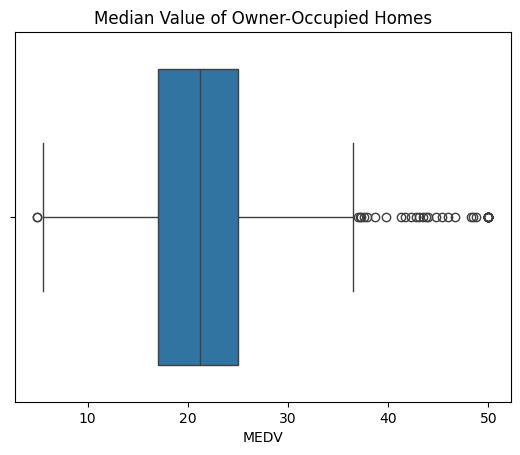

In [5]:
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Median Value of Owner-Occupied Homes')

Text(0.5, 1.0, 'Bar Plot of Charles River Variable')

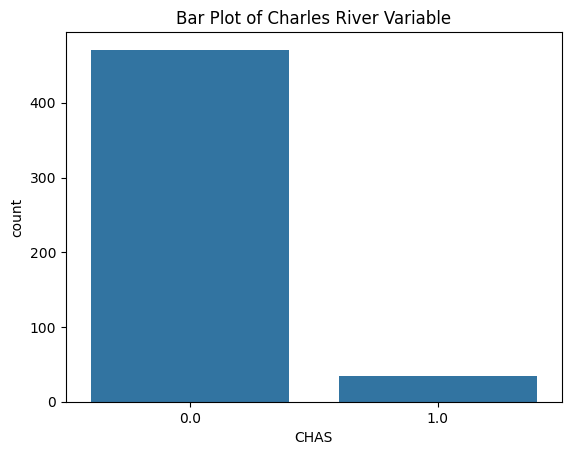

In [11]:
sns.countplot(x=boston_df['CHAS'], data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')

Text(0.5, 1.0, 'Boxplot of MEDV vs AGE (Discretized)')

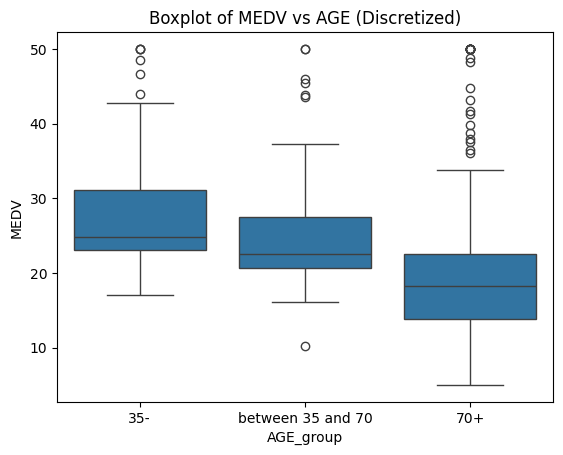

In [12]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35-', 'between 35 and 70', '70+'])
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'], data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE (Discretized)')

Text(0.5, 1.0, 'Scatter Plot of NOX vs INDUS')

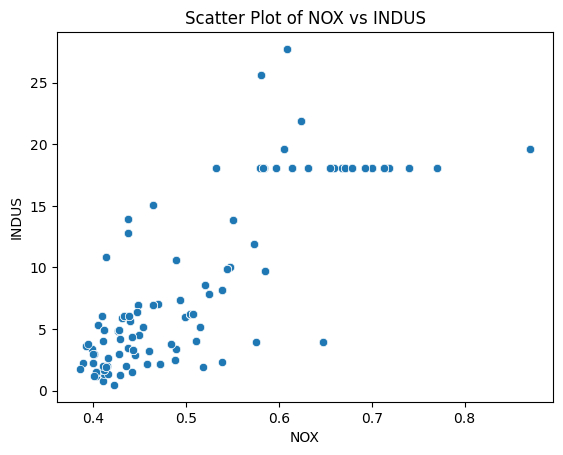

In [13]:
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'], data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')

Text(0.5, 1.0, 'Histogram of Pupil-Teacher Ratio (PTRATIO)')

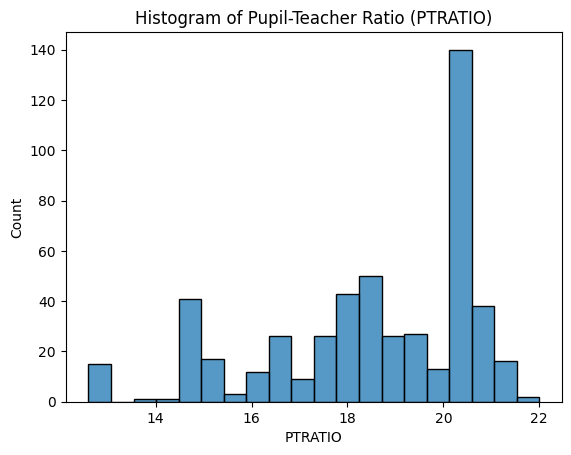

In [14]:
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')

<h2>Task 5:

<h2>hypthesis stating</h2>

1/
Null Hypothesis (H0): There is no significant difference in the median value of houses between those bounded by the Charles river and those that are not.
Alternative Hypothesis (H1): There is a significant difference in the median value of houses between those bounded by the Charles river and those that are not.

In [15]:
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(bounded, not_bounded)
if p_value < 0.05:
    print(f"Reject the null hypothesis. There is a significant difference (p_value = {p_value})")
else:
    print(f"Fail to reject the null hypothesis. There is no significant difference (p_value = {p_value})")


Reject the null hypothesis. There is a significant difference (p_value = 7.390623170519905e-05)


<h2>hypthesis stating</h2>

2/
Null Hypothesis (H0): There is no significant difference in the median values of houses across different age groups.
Alternative Hypothesis (H1): There is a significant difference in the median values of houses across different age groups


In [16]:
res,p_value=scipy.stats.f_oneway(boston_df[boston_df['AGE_group'] == '35-']['MEDV'],
                      boston_df[boston_df['AGE_group'] == 'between 35 and 70']['MEDV'],
                      boston_df[boston_df['AGE_group'] == '70+']['MEDV'])
if p_value < 0.05:
    print(f"Reject the null hypothesis. There is a significant difference (p_value = {p_value})")
else:
    print(f"Fail to reject the null hypothesis. There is no significant difference (p_value = {p_value})")

Reject the null hypothesis. There is a significant difference (p_value = 1.7105011022702984e-15)


<h2>hypthesis stating</h2>

3/
Null Hypothesis (H0): There is no significant correlation between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).
Alternative Hypothesis (H1): There is a significant correlation between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS)


In [17]:
res,p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
if p_value < 0.05:
    print(f"Reject the null hypothesis. There is a significant difference (p_value = {p_value})")
else:
    print(f"Fail to reject the null hypothesis. There is no significant difference (p_value = {p_value})")

Reject the null hypothesis. There is a significant difference (p_value = 7.913361061210442e-98)


<h2>hypthesis stating</h2>

4/
Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
Alternative Hypothesis (H1): There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.


In [19]:
model=sm.OLS(boston_df['MEDV'],boston_df['DIS'] ).fit()
pre=model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                   1.52e-146
Time:                        16:08:43   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Conclusion:</h2>

->Fail to reject the null hypothesis.